In [1]:
import numpy as np
from geometricus_deep_learning import utils, embedder
import matplotlib.pyplot as plt
import torch
from glob import glob
import pprint

%load_ext autoreload
%autoreload 2


In [2]:
pdb_folder = "./data/scope/"

In [3]:
invariant_types = [embedder.InvariantType(type=embedder.SplitType.KMER, 
                                          k=30, moment_types=None),
                   embedder.InvariantType(type=embedder.SplitType.RADIUS, 
                                          k=10, moment_types=None)]

In [4]:
files = {x.split("/")[-1] for x in glob(pdb_folder + "*")}
files

{'d2x5oa2.ent',
 'd4ay9b_.ent',
 'd2j01e1.ent',
 'd1v2xa_.ent',
 'd4efia2.ent',
 'd2p2wa_.ent',
 'd3m00a1.ent',
 'd4rgda_.ent',
 'd1r8na_.ent',
 'd3ni8a1.ent',
 'd1g40a1.ent',
 'd1fl0a1.ent',
 'd2fl4a1.ent',
 'd2wvfa1.ent',
 'd1u0ma2.ent',
 'd2zkmx3.ent',
 'd4gamd_.ent',
 'd1a3qa2.ent',
 'd2jdid3.ent',
 'd3i1ia_.ent',
 'd3f6ya_.ent',
 'd3umoa_.ent',
 'd1tpga2.ent',
 'd4xcod_.ent',
 'd1zela2.ent',
 'd1zvna1.ent',
 'd3olja1.ent',
 'd1x5oa1.ent',
 'd2lb9a1.ent',
 'd1t3ta6.ent',
 'd1jpma2.ent',
 'd5bsra_.ent',
 'd1ut3a_.ent',
 'd4qbla_.ent',
 'd2yyua_.ent',
 'd2a2pa1.ent',
 'd3rg8a_.ent',
 'd1el0a_.ent',
 'd2gaua1.ent',
 'd2diva1.ent',
 'd2hi0a1.ent',
 'd4x5pa_.ent',
 'd2rfra1.ent',
 'd2i5ia1.ent',
 'd1kgsa2.ent',
 'd1repc2.ent',
 'd2o70a1.ent',
 'd1jjfa_.ent',
 'd2r25b_.ent',
 'd2arza1.ent',
 'd2qs8a1.ent',
 'd1v1ha1.ent',
 'd2odye2.ent',
 'd1tu1a1.ent',
 'd3g0oa2.ent',
 'd1jqga1.ent',
 'd1xkqa_.ent',
 'd4zd6a_.ent',
 'd3zuka_.ent',
 'd1ym0a_.ent',
 'd1mv5a_.ent',
 'd1mbaa_.ent',
 'd4h60a

In [21]:
domain_info = utils.ScopeInfo.from_scope_class_file("./data/dir.cla.scope.2.05-stable.txt").scope_classification
mappings = {f"{k}.ent": f"{v.sf}" for k, v in domain_info.items() if f"{k}.ent" in files}

In [22]:
keys, counts = np.unique(list(mappings.values()), return_counts=True)
least_allowed_class_count = 20
keys_to_use = {x for x in keys[np.where(counts >= least_allowed_class_count)[0]]}
mappings = {k: v for k, v in mappings.items() if v in keys_to_use}
print("cath info linked to files")
len(keys_to_use), len(mappings)

cath info linked to files


(120, 5676)

In [148]:
# !mkdir ./models/scope_superfamily_model

In [23]:
# Create and train the model.. takes some time to start due to the preprocessing step

emb = embedder.GeometricusGraphEmbedder.fit("./data/scope/", invariant_types, mappings,
                                            epochs=3_000, file_output_path="./models/scope_superfamily_model/",
                                            learning_rate=0.001, number_of_batches=1028,
                                            hidden_channels=60)

Initial: Train Acc: 0.0106, Test Acc: 0.0088
Epoch: 010, Train Acc: 0.0722, Test Acc: 0.0687
Epoch: 020, Train Acc: 0.1466, Test Acc: 0.1336
Epoch: 030, Train Acc: 0.1985, Test Acc: 0.1704
Epoch: 040, Train Acc: 0.2504, Test Acc: 0.2143
Epoch: 050, Train Acc: 0.2926, Test Acc: 0.2513
Epoch: 060, Train Acc: 0.3272, Test Acc: 0.2826
Epoch: 070, Train Acc: 0.3594, Test Acc: 0.3136
Epoch: 080, Train Acc: 0.3814, Test Acc: 0.3357
Epoch: 090, Train Acc: 0.4006, Test Acc: 0.3548
Epoch: 100, Train Acc: 0.4216, Test Acc: 0.3752
Epoch: 110, Train Acc: 0.4398, Test Acc: 0.3963
Epoch: 120, Train Acc: 0.4524, Test Acc: 0.4064
Epoch: 130, Train Acc: 0.4673, Test Acc: 0.4228
Epoch: 140, Train Acc: 0.4794, Test Acc: 0.4286
Epoch: 150, Train Acc: 0.4894, Test Acc: 0.4422
Epoch: 160, Train Acc: 0.4998, Test Acc: 0.4488
Epoch: 170, Train Acc: 0.5100, Test Acc: 0.4564
Epoch: 180, Train Acc: 0.5184, Test Acc: 0.4604
Epoch: 190, Train Acc: 0.5243, Test Acc: 0.4652
Epoch: 200, Train Acc: 0.5316, Test Acc: 0.

Epoch: 1700, Train Acc: 0.8335, Test Acc: 0.6886
Epoch: 1710, Train Acc: 0.8355, Test Acc: 0.6901
Epoch: 1720, Train Acc: 0.8362, Test Acc: 0.6918
Epoch: 1730, Train Acc: 0.8379, Test Acc: 0.6895
Epoch: 1740, Train Acc: 0.8390, Test Acc: 0.6904
Epoch: 1750, Train Acc: 0.8410, Test Acc: 0.6920
Epoch: 1760, Train Acc: 0.8396, Test Acc: 0.6931
Epoch: 1770, Train Acc: 0.8405, Test Acc: 0.6940
Epoch: 1780, Train Acc: 0.8442, Test Acc: 0.6945
Epoch: 1790, Train Acc: 0.8416, Test Acc: 0.6941
Epoch: 1800, Train Acc: 0.8465, Test Acc: 0.6974
Epoch: 1810, Train Acc: 0.8448, Test Acc: 0.6962
Epoch: 1820, Train Acc: 0.8467, Test Acc: 0.6962
Epoch: 1830, Train Acc: 0.8442, Test Acc: 0.6930
Epoch: 1840, Train Acc: 0.8464, Test Acc: 0.6935
Epoch: 1850, Train Acc: 0.8468, Test Acc: 0.6981
Epoch: 1860, Train Acc: 0.8447, Test Acc: 0.6964
Epoch: 1870, Train Acc: 0.8475, Test Acc: 0.6990
Epoch: 1880, Train Acc: 0.8506, Test Acc: 0.7007
Epoch: 1890, Train Acc: 0.8496, Test Acc: 0.6988
Epoch: 1900, Train A

In [25]:
raw_embedding, labels, predicted_labels, pdb_ids = emb.get_embedding([emb.test_set], emb.model)

<AxesSubplot:>

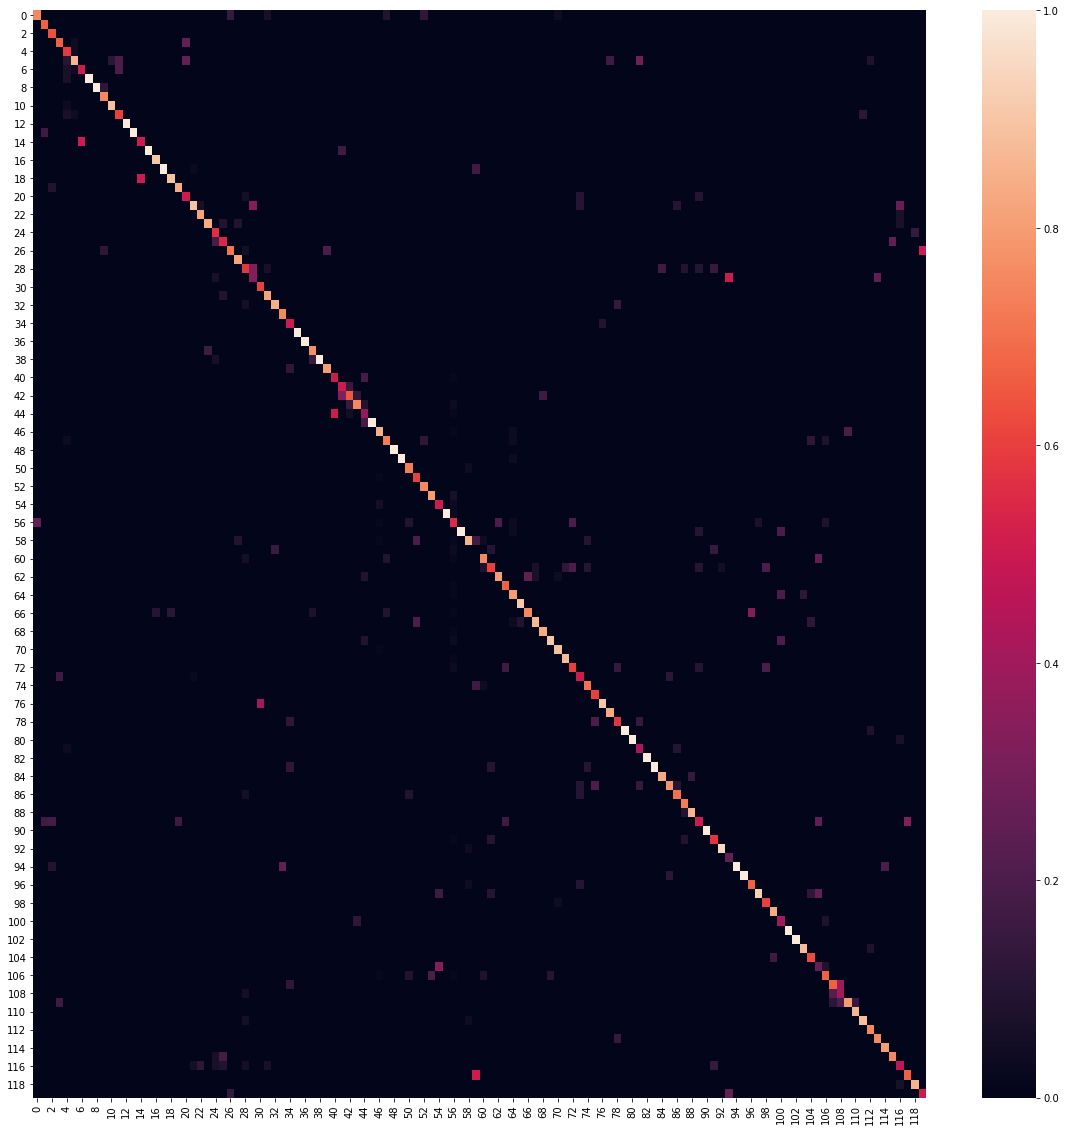

In [36]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(labels, predicted_labels)
conf_mat = conf_mat / conf_mat.sum(axis=0)

from seaborn import heatmap

plt.figure(figsize=(20,20))
heatmap(conf_mat)

In [37]:
import requests as rq
scope_id_to_name = {x.split("\t")[0]: x.split("\t")[4] for x in rq.get("https://scop.berkeley.edu/downloads/parse/dir.des.scope.2.05-stable.txt").text.split("\n") if not x.startswith("#") and len(x)}

Class probabilities of d2ctja1.ent:


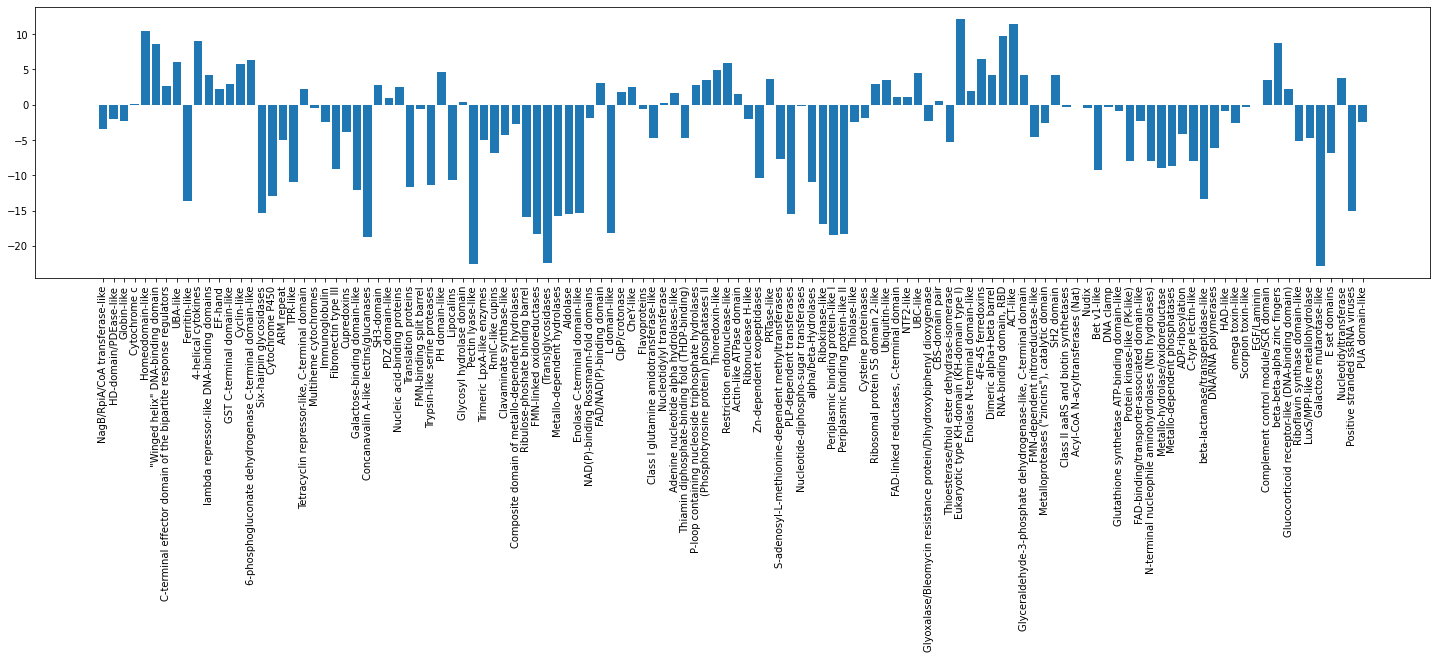

top 10:
 ['Eukaryotic type KH-domain (KH-domain type I)' 'ACT-like'
 'Homeodomain-like' 'RNA-binding domain, RBD' '4-helical cytokines'
 'beta-beta-alpha zinc fingers' '"Winged helix" DNA-binding domain'
 '4Fe-4S ferredoxins'
 '6-phosphogluconate dehydrogenase C-terminal domain-like' 'UBA-like'] 


Class probabilities of d2fdna_.ent:


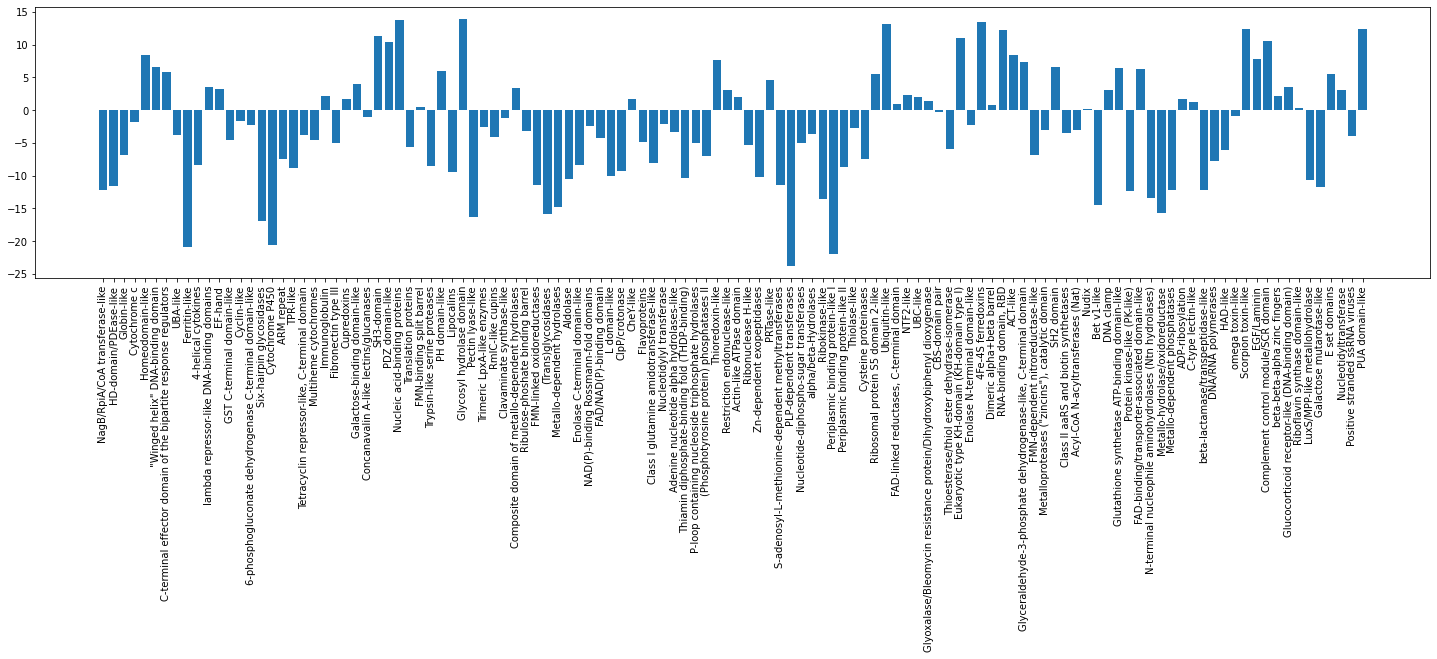

top 10:
 ['Glycosyl hydrolase domain' 'Nucleic acid-binding proteins'
 '4Fe-4S ferredoxins' 'Ubiquitin-like' 'Scorpion toxin-like'
 'PUA domain-like' 'RNA-binding domain, RBD' 'SH3-domain'
 'Eukaryotic type KH-domain (KH-domain type I)'
 'Complement control module/SCR domain'] 


Class probabilities of d4dgja_.ent:


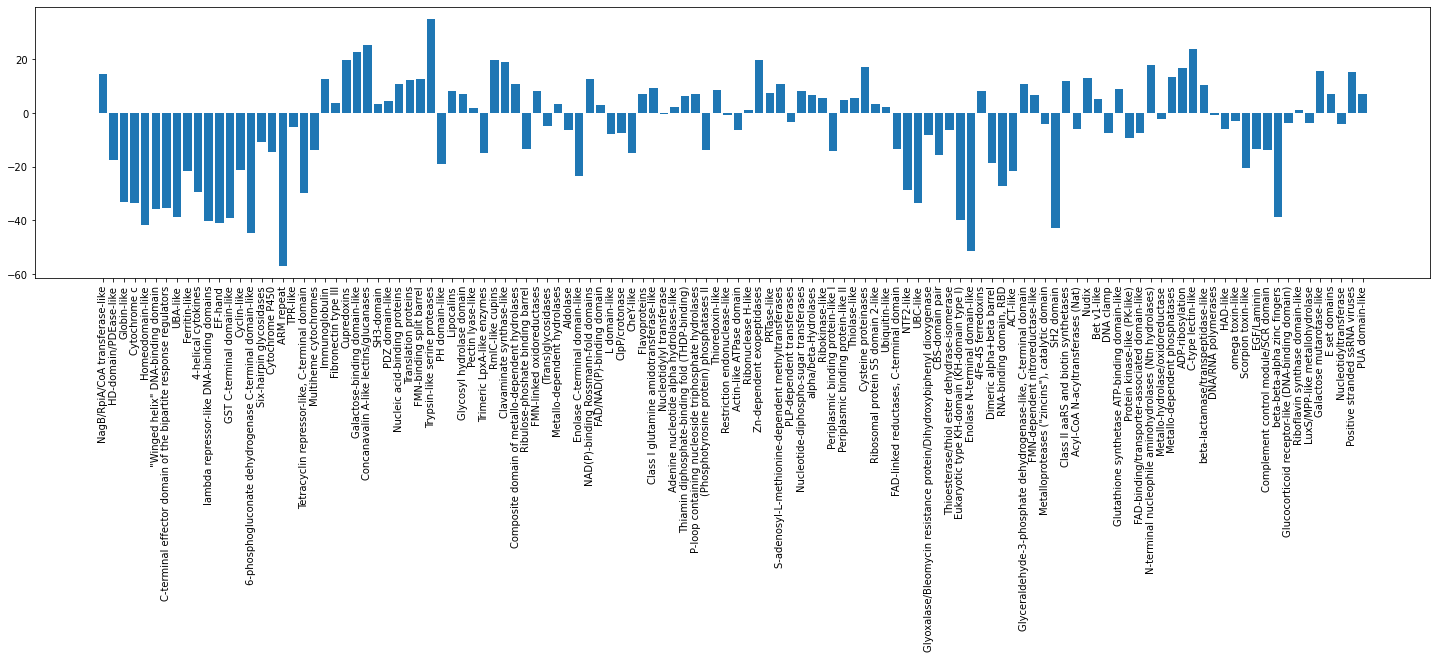

top 10:
 ['Trypsin-like serine proteases' 'Concanavalin A-like lectins/glucanases'
 'C-type lectin-like' 'Galactose-binding domain-like'
 'Zn-dependent exopeptidases' 'Cupredoxins' 'RmlC-like cupins'
 'Clavaminate synthase-like'
 'N-terminal nucleophile aminohydrolases (Ntn hydrolases)'
 'Cysteine proteinases'] 


Class probabilities of d4noga_.ent:


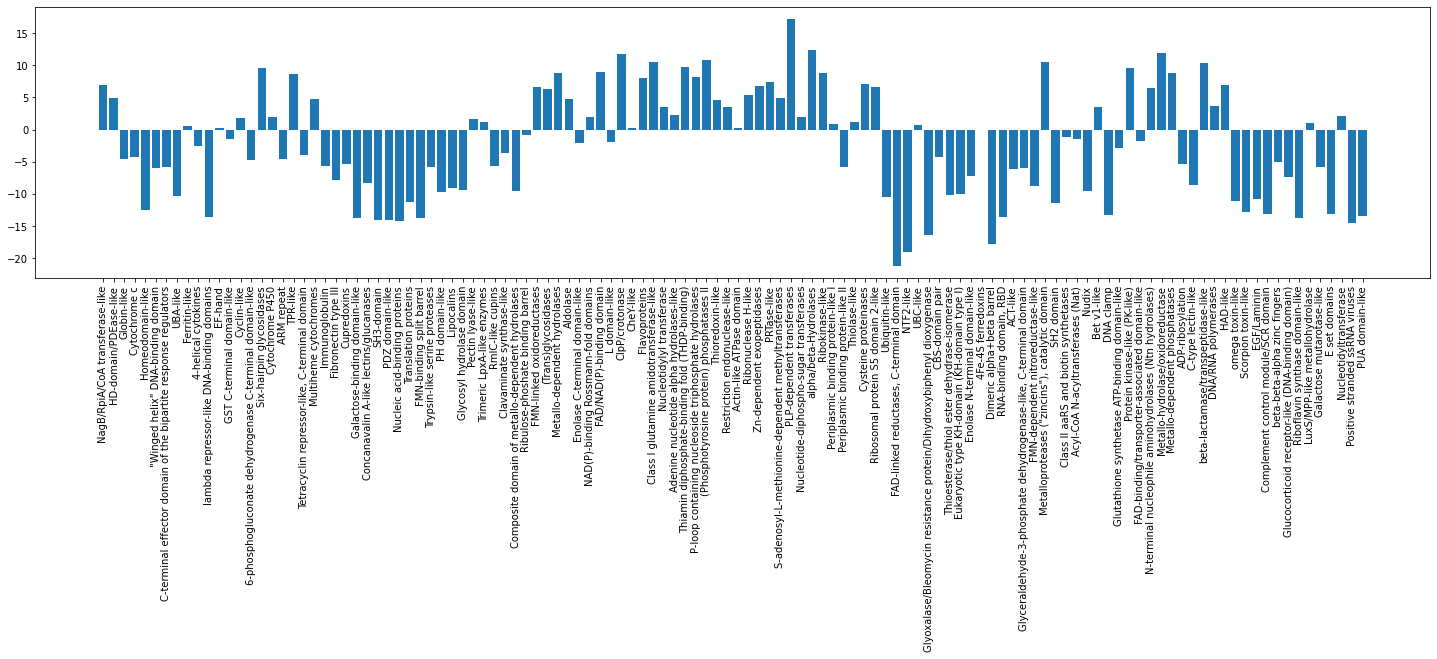

top 10:
 ['PLP-dependent transferases' 'alpha/beta-Hydrolases'
 'Metallo-hydrolase/oxidoreductase' 'ClpP/crotonase'
 '(Phosphotyrosine protein) phosphatases II'
 'Metalloproteases ("zincins"), catalytic domain'
 'Class I glutamine amidotransferase-like'
 'beta-lactamase/transpeptidase-like'
 'Thiamin diphosphate-binding fold (THDP-binding)'
 'Six-hairpin glycosidases'] 


Class probabilities of d2flha_.ent:


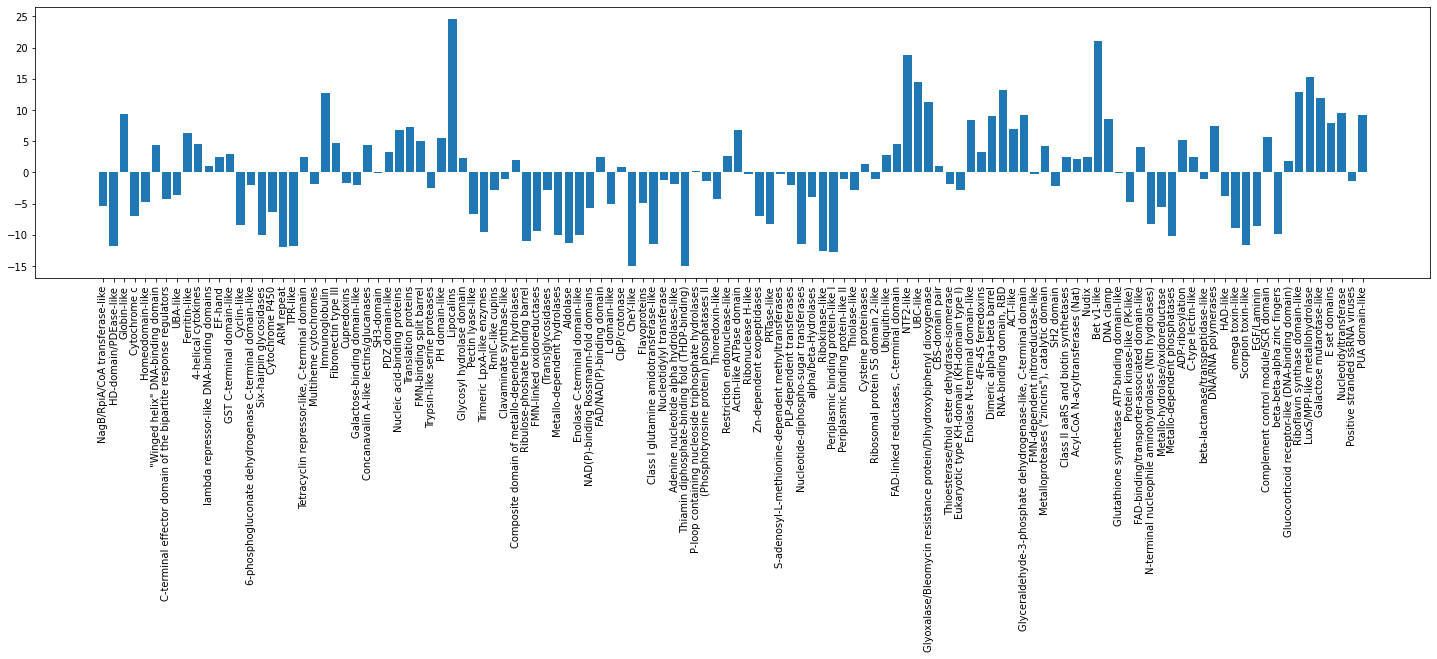

top 10:
 ['Lipocalins' 'Bet v1-like' 'NTF2-like' 'LuxS/MPP-like metallohydrolase'
 'UBC-like' 'RNA-binding domain, RBD' 'Riboflavin synthase domain-like'
 'Immunoglobulin' 'Galactose mutarotase-like'
 'Glyoxalase/Bleomycin resistance protein/Dihydroxybiphenyl dioxygenase'] 


Class probabilities of d2gb3a1.ent:


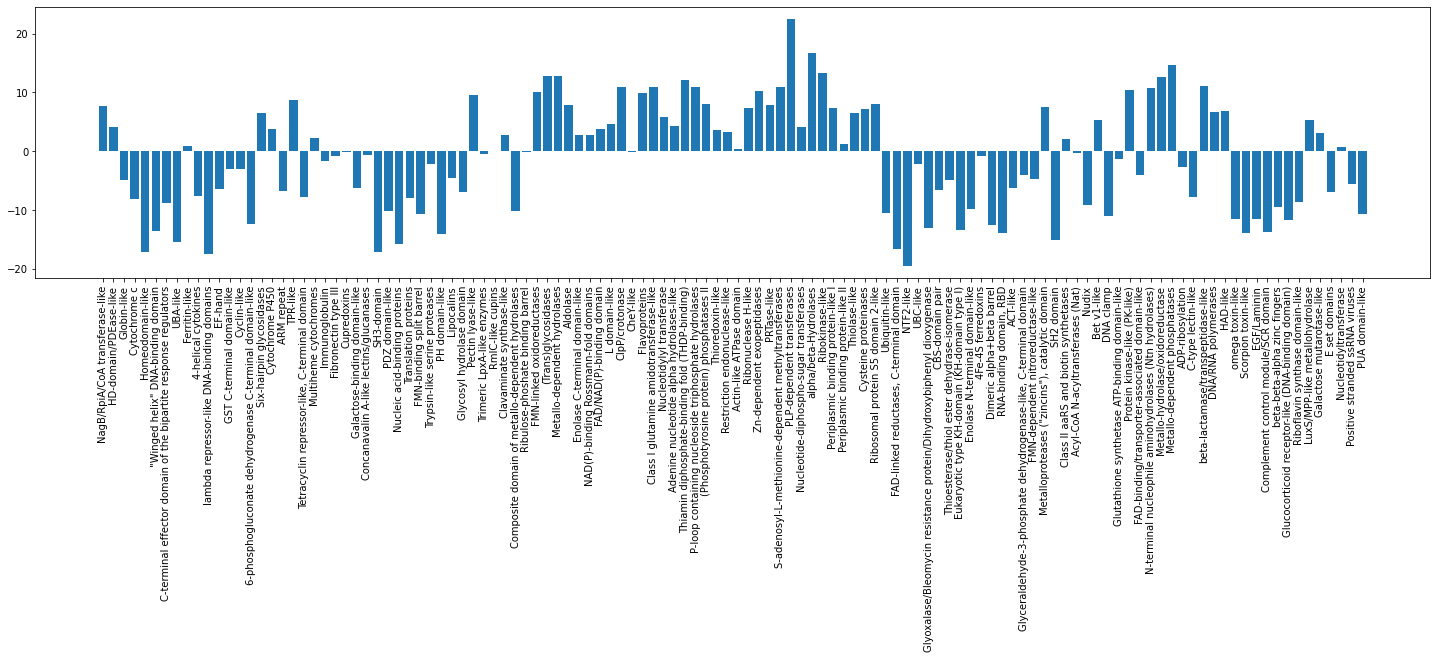

top 10:
 ['PLP-dependent transferases' 'alpha/beta-Hydrolases'
 'Metallo-dependent phosphatases' 'Ribokinase-like'
 'Metallo-dependent hydrolases' '(Trans)glycosidases'
 'Metallo-hydrolase/oxidoreductase'
 'Thiamin diphosphate-binding fold (THDP-binding)'
 'beta-lactamase/transpeptidase-like'
 'S-adenosyl-L-methionine-dependent methyltransferases'] 


Class probabilities of d2fgza1.ent:


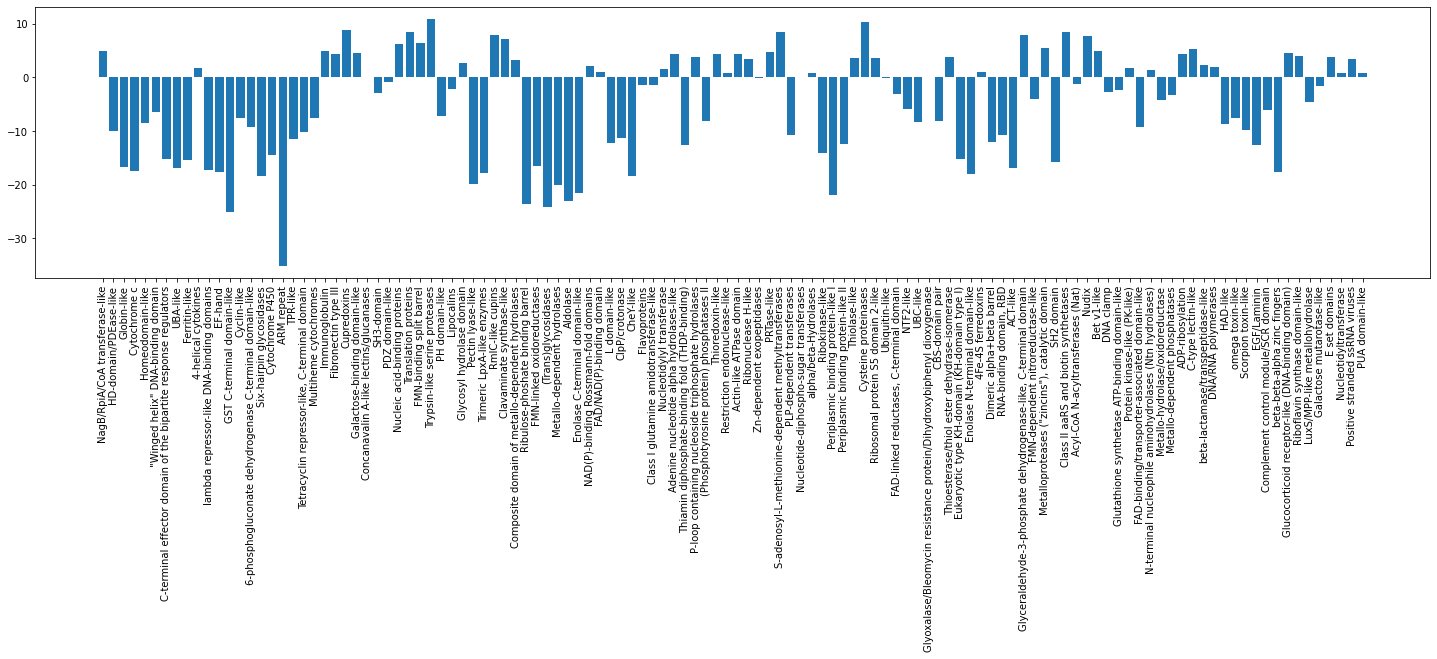

top 10:
 ['Trypsin-like serine proteases' 'Cysteine proteinases' 'Cupredoxins'
 'S-adenosyl-L-methionine-dependent methyltransferases'
 'Class II aaRS and biotin synthetases' 'Translation proteins'
 'Glyceraldehyde-3-phosphate dehydrogenase-like, C-terminal domain'
 'RmlC-like cupins' 'Nudix' 'Clavaminate synthase-like'] 


Class probabilities of d2hlca_.ent:


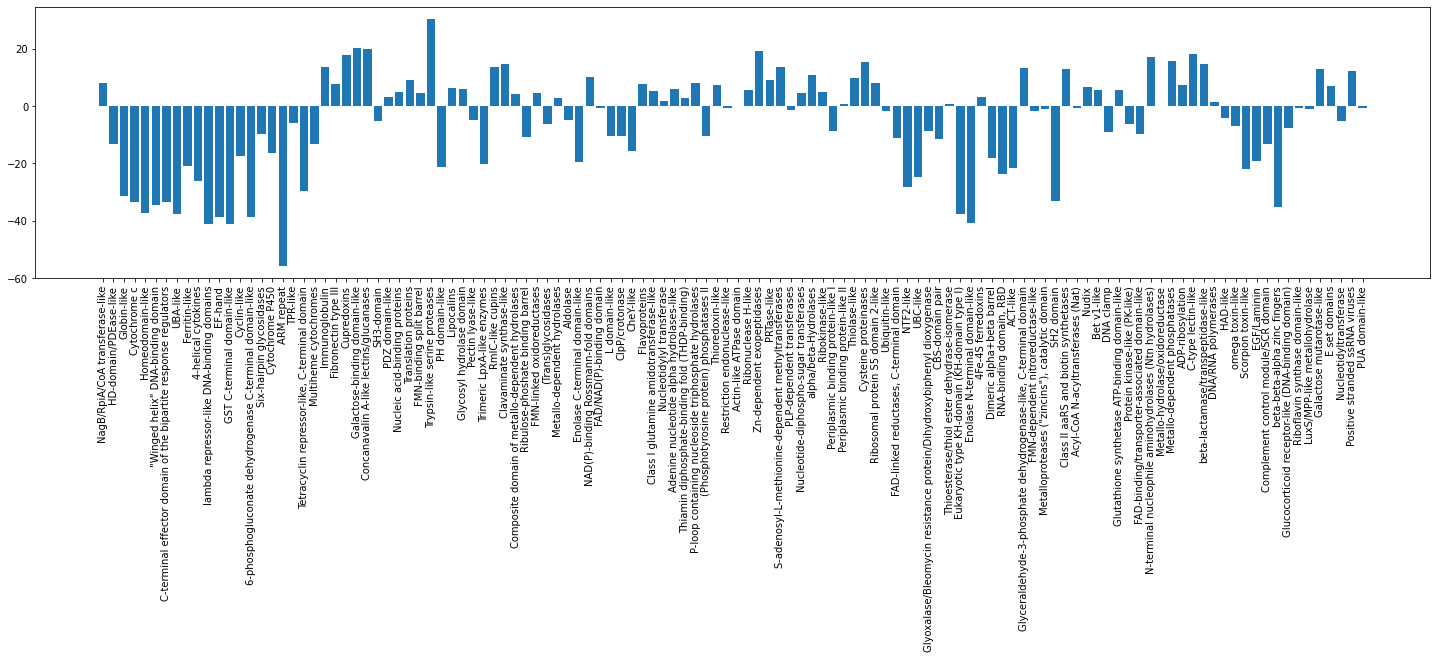

top 10:
 ['Trypsin-like serine proteases' 'Galactose-binding domain-like'
 'Concanavalin A-like lectins/glucanases' 'Zn-dependent exopeptidases'
 'C-type lectin-like' 'Cupredoxins'
 'N-terminal nucleophile aminohydrolases (Ntn hydrolases)'
 'Metallo-dependent phosphatases' 'Cysteine proteinases'
 'beta-lactamase/transpeptidase-like'] 


Class probabilities of d3c5ca_.ent:


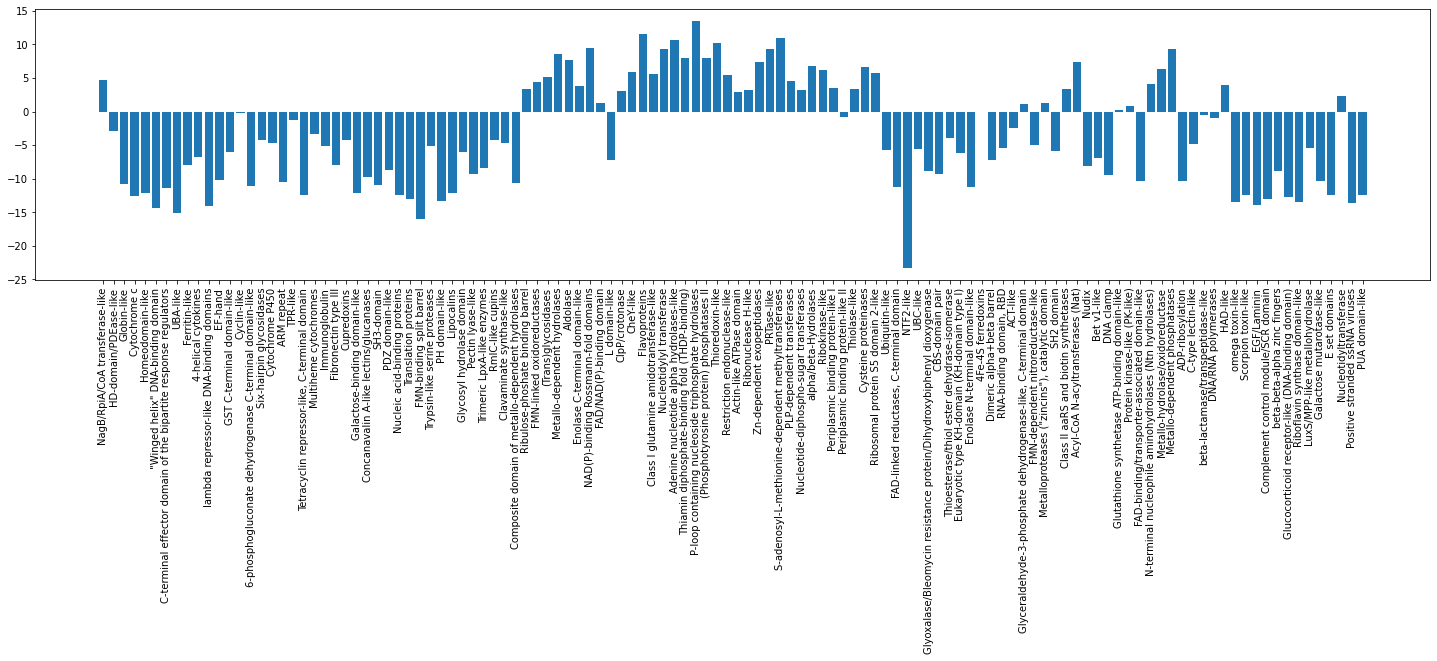

top 10:
 ['P-loop containing nucleoside triphosphate hydrolases' 'Flavoproteins'
 'S-adenosyl-L-methionine-dependent methyltransferases'
 'Adenine nucleotide alpha hydrolases-like' 'Thioredoxin-like'
 'NAD(P)-binding Rossmann-fold domains' 'Metallo-dependent phosphatases'
 'PRTase-like' 'Nucleotidylyl transferase' 'Metallo-dependent hydrolases'] 


Class probabilities of d2gf3a1.ent:


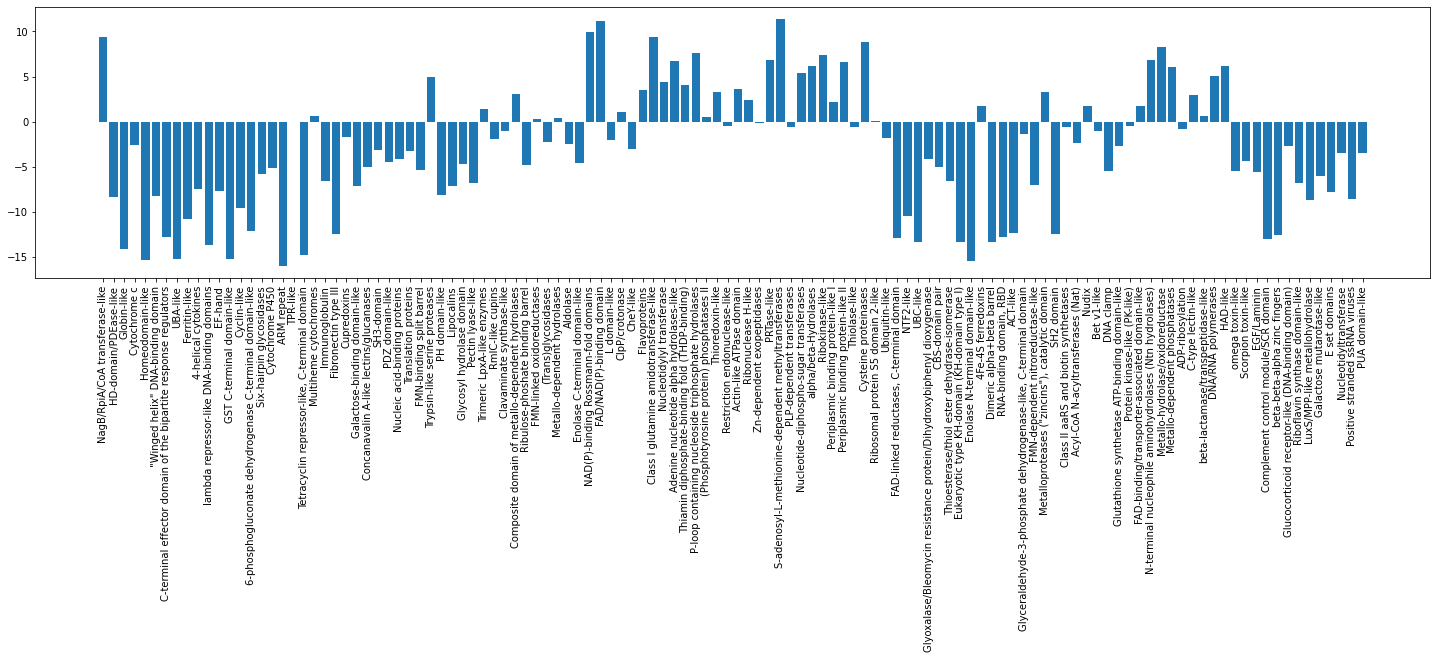

top 10:
 ['S-adenosyl-L-methionine-dependent methyltransferases'
 'FAD/NAD(P)-binding domain' 'NAD(P)-binding Rossmann-fold domains'
 'Class I glutamine amidotransferase-like'
 'NagB/RpiA/CoA transferase-like' 'Cysteine proteinases'
 'Metallo-hydrolase/oxidoreductase'
 'P-loop containing nucleoside triphosphate hydrolases' 'Ribokinase-like'
 'N-terminal nucleophile aminohydrolases (Ntn hydrolases)'] 




In [39]:
for i in range(10):
    print(f"Class probabilities of {pdb_ids[i]}:")
    plt.figure(figsize=(25,5))
    classes = np.array([scope_id_to_name[emb.id_to_classname[x]] for x in range(raw_embedding.shape[1])])
    plt.bar(classes, raw_embedding[i])
    plt.xticks(rotation=90)
    plt.show()
    print("top 10:\n", classes[np.argsort(raw_embedding[i])[::-1]][:10], "\n\n")

In [40]:
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

In [41]:
clusters = cluster.KMeans(n_clusters=20)
clusters.fit(raw_embedding.T)

KMeans(n_clusters=20)

In [42]:
for cluster_id in np.unique(clusters.labels_):
    print(f"cluster {cluster_id}:")
    print(classes[np.arange(raw_embedding.shape[1])[clusters.labels_ == cluster_id]],"\n")

cluster 0:
['SH3-domain' 'PDZ domain-like'
 'Composite domain of metallo-dependent hydrolases' 'Ubiquitin-like'
 'Glyoxalase/Bleomycin resistance protein/Dihydroxybiphenyl dioxygenase'
 'Nudix' 'ADP-ribosylation' 'C-type lectin-like' 'PUA domain-like'] 

cluster 1:
['HD-domain/PDEase-like' 'Cyclin-like' 'TPR-like' 'CheY-like'
 '(Phosphotyrosine protein) phosphatases II'] 

cluster 2:
['Bet v1-like' 'Protein kinase-like (PK-like)'
 'beta-lactamase/transpeptidase-like' 'LuxS/MPP-like metallohydrolase'] 

cluster 3:
['NAD(P)-binding Rossmann-fold domains' 'ClpP/crotonase' 'Flavoproteins'
 'Nucleotidylyl transferase' 'Adenine nucleotide alpha hydrolases-like'
 'P-loop containing nucleoside triphosphate hydrolases' 'PRTase-like'
 'Nucleotide-diphospho-sugar transferases' 'Cysteine proteinases'
 'DNA/RNA polymerases'] 

cluster 4:
['Nucleic acid-binding proteins' 'FMN-binding split barrel'
 'PH domain-like' 'Glycosyl hydrolase domain' 'NTF2-like'
 'RNA-binding domain, RBD' 'Complement contro

In [44]:
from umap import UMAP
umap_embedding = UMAP(n_neighbors=50, n_components=2).fit_transform(raw_embedding.T)

import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=umap_embedding[:, 0],
                                y=umap_embedding[:, 1],
                                mode='markers',
                                marker_color=clusters.labels_,
                                text=classes)) # hover text goes here

fig.update_layout(title='Superfamily domain similarity')
fig.show()

In [50]:
from umap import UMAP
umap_embedding = UMAP(n_neighbors=50, n_components=2).fit_transform(raw_embedding)

import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=umap_embedding[:, 0],
                                y=umap_embedding[:, 1],
                                mode='markers',
                                marker_color=labels,
                                text=[("real label", scope_id_to_name[emb.id_to_classname[x]], "pred label:",
                                       scope_id_to_name[emb.id_to_classname[predicted_labels[i]]]) for i,x in enumerate(labels)])) # hover text goes here

fig.update_layout(title='Individual domain similarity')
fig.show()